## Geração de Energia Renovável 1997 - 2017

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 3.3 MB/s eta 0:00:01    |██████████                      | 3.1 MB 3.3 MB/s eta 0:00:03
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=4d6dffb2cd76d30c42be6c5c0458d5d52ffdcfc85baa91235400650a5f73abf4
  Stored in directory: /Users/rayonilcarneiro/Library/Caches/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pycountry

Os arquivos de dados de entrada estão disponíveis no diretório somente leitura "../Global Energy Consumption & Renewable Generation/"

Por exemplo, ao executar a linha a seguir listará todos os arquivos no diretório de entrada

In [5]:
import os
for dirname, _, filenames in os.walk('.../Global Energy Consumption & Renewable Generation/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Global Energy Consumption & Renewable Generation/Continent_Consumption_TWH.xls
Global Energy Consumption & Renewable Generation/renewablesTotalPowerGeneration.xls
Global Energy Consumption & Renewable Generation/Country_Consumption_TWH.xls
Global Energy Consumption & Renewable Generation/top20CountriesPowerGeneration.xls
Global Energy Consumption & Renewable Generation/renewablePowerGeneration97-17.xls
Global Energy Consumption & Renewable Generation/nonRenewablesTotalPowerGeneration.xls


### Questões de pesquisa

 1. Quais fontes de energia renovável tiveram a maior mudança nos retornos desde 1990?
 2. Quais nações estão gerando mais energia a partir de fontes renováveis?
 3. Quais nações estão consumindo mais energia?
 4. Quais nações registaram o maior crescimento na procura de energia e quais tiveram diminuições na procura?
 5. Quanto da procura global de energia é actualmente suprida por fontes renováveis?



Estrutura de Análise

Este relatório começará por analisar a energia gerada a partir de fontes renováveis e os países líderes no setor renovável. Em seguida, analisará as estatísticas de consumo nacionais e continentais/grupos para contextualizar e ilustrar os aumentos necessários para que as energias renováveis superem as não renováveis como principal fonte de energia. Por último, irá delinear a procura actual em comparação com a oferta de energia renovável disponível.

### Os 20 principais países que geram energia renovável

In [7]:
df_top_20 = pd.read_csv('.../Global Energy Consumption & Renewable Generation/top20CountriesPowerGeneration.xls')
df_top_20.head()

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.0200,79.43,0.1250,1819.9400
1,USA,315.62,277.9100,58.95,18.9600,758.6190
2,Brazil,370.90,42.3700,52.25,0.0000,466.3500
3,Canada,383.48,29.6500,7.12,0.0000,424.0900
4,India,141.80,51.0600,43.76,0.0000,262.6500
5,Germany,24.17,111.5900,45.10,0.1600,227.1800
6,Russia,187.13,0.1400,0.08,0.4300,188.3300
7,Japan,90.67,7.6300,19.01,2.4400,187.3490
8,France,70.13,28.5000,5.87,0.1300,114.8200
9,Italy,50.92,17.4900,16.85,6.0800,113.9900


Text(0.5, 1.02, 'Top 20 Countries Generating Renewable Energy (TWh)')

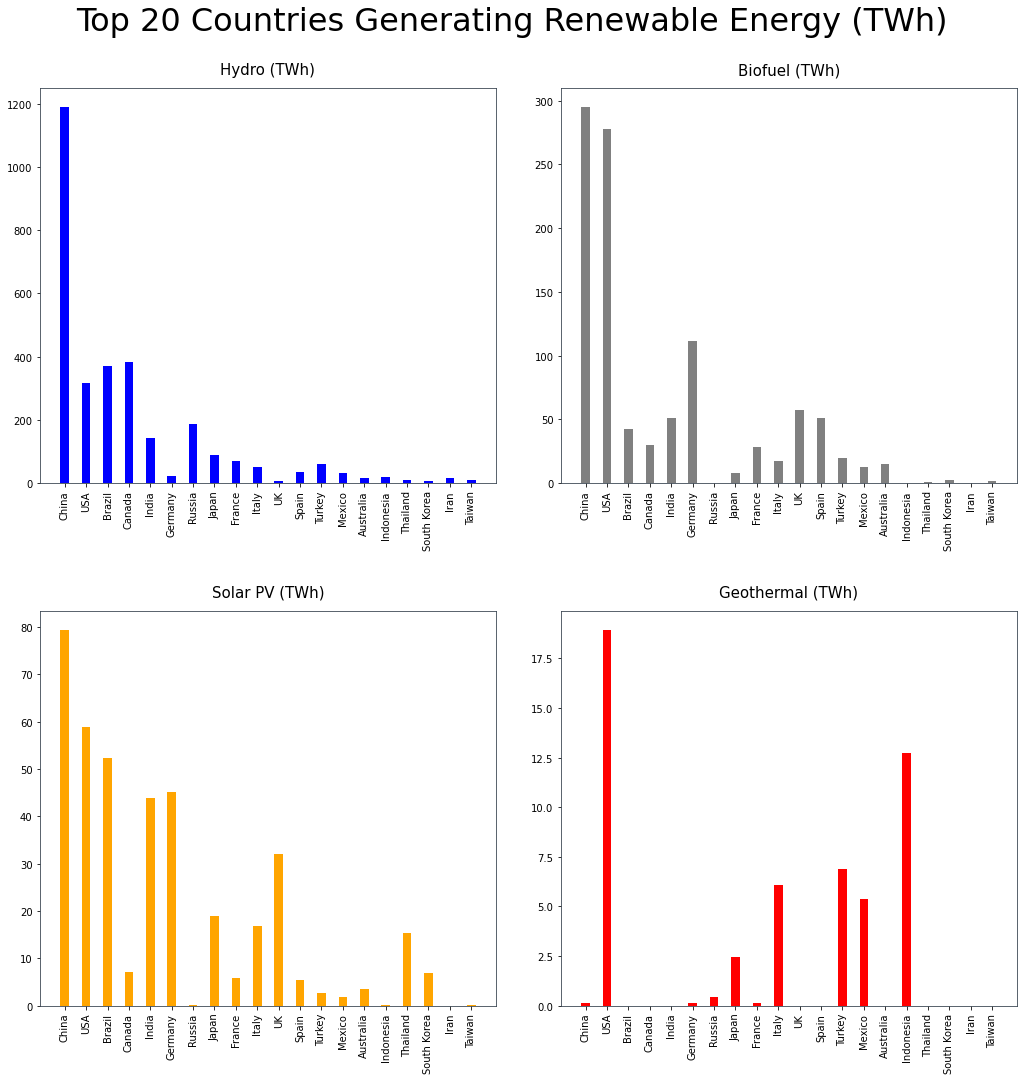

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

X = df_top_20.iloc[:,0] # Definir X como a coluna dos 20 principais países 

y1 = df_top_20.iloc[:,1] # y1 produção de Hydro(TWh)
y2 = df_top_20.iloc[:,2] # y2 produção de Biofuel(TWh)
y3 = df_top_20.iloc[:,3] # y3 produção de Solar PV (TWh)
y4 = df_top_20.iloc[:,4] # y4 produção de Geothermal (TWh)


ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

ax[0,0].bar(X,y1,width=.4, color=['blue'])
ax[0,1].bar(X,y2,width=.4,color=['gray'])
ax[1,0].bar(X,y3,width=.4,color=['orange'])
ax[1,1].bar(X,y4,width=.4,color=['red'])

ax[0,0].set_title('Hydro (TWh)',fontsize=15, y=1.02)
ax[0,1].set_title('Biofuel (TWh)',fontsize=15, y=1.02)
ax[1,0].set_title('Solar PV (TWh)',fontsize=15, y=1.02)
ax[1,1].set_title('Geothermal (TWh)',fontsize=15, y=1.02)

fig.tight_layout(pad=3.5)
fig.suptitle('Top 20 Countries Generating Renewable Energy (TWh)', fontsize=32, y=1.02, color='black')

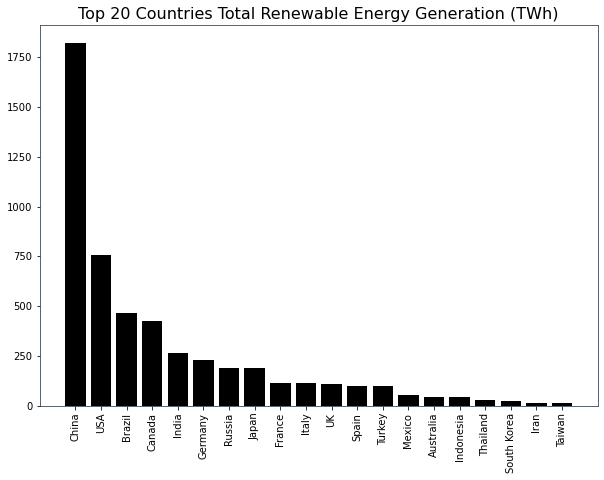

In [16]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=df_top_20['Country']
y_total=df_top_20['Total (TWh)']
plt.bar(X_total, y_total, color='black')
plt.title('Top 20 Countries Total Renewable Energy Generation (TWh)', size=16)
ax.tick_params(axis='x', rotation=90)


In [18]:
df_total_renew = pd.read_csv('Global Energy Consumption & Renewable Generation/renewablesTotalPowerGeneration.xls')

In [22]:
df_total_renew.drop([8], inplace=True) # Eliminar a linha final com o total dos países
df_total_renew.head(10)

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04
5,Renewable waste,74.05
6,Solar Thermal,36.02
7,Tidal,19448.16


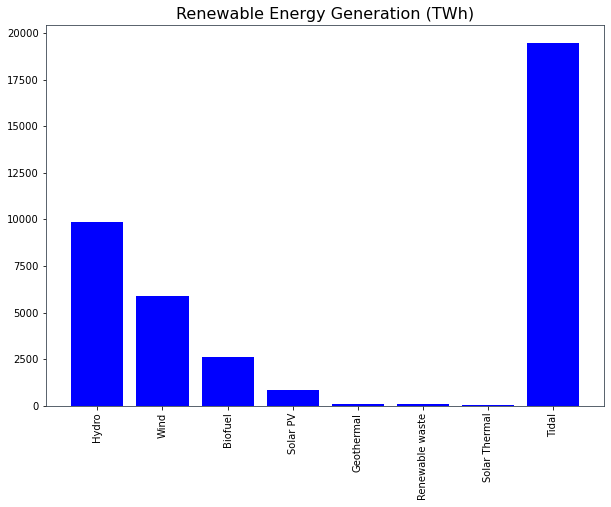

In [26]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=df_total_renew['Mode of Generation']
y_total=df_total_renew['Contribution (TWh)']
plt.bar(X_total, y_total, color='blue')
plt.title('Renewable Energy Generation (TWh)', size=16)
ax.tick_params(axis='x', rotation=90)

In [29]:
df_total_renew['Contribution (TWh)'].sum()

38896.32

### Geração de Energia Não Renovável

In [24]:
df_total_nonrenew = pd.read_csv('.../Global Energy Consumption & Renewable Generation/nonRenewablesTotalPowerGeneration.xls')

In [25]:
df_total_nonrenew.drop([7], inplace=True) # Eliminar a linha final com o total dos países
df_total_nonrenew.head(10)

,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04
5,Municipal Wastes,74.05
6,Others,36.02


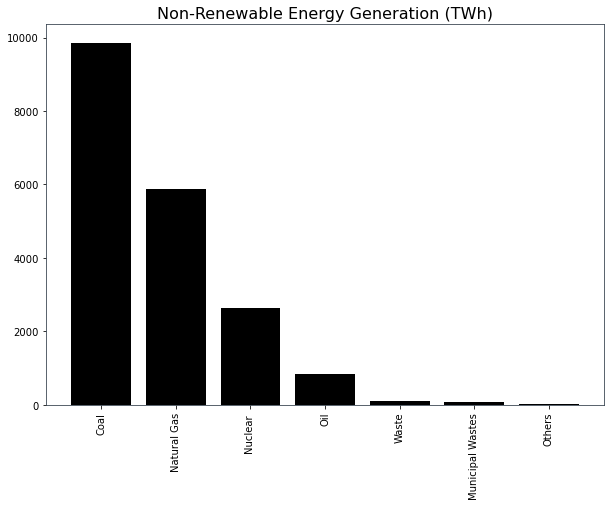

In [27]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_nontotal=df_total_nonrenew['Mode of Generation']
y_nontotal=df_total_nonrenew['Contribution (TWh)']
plt.bar(X_nontotal, y_nontotal, color='black')
plt.title('Non-Renewable Energy Generation (TWh)', size=16)
ax.tick_params(axis='x', rotation=90)

In [28]:
df_total_nonrenew['Contribution (TWh)'].sum()

19448.16

### Mudanças na geração de energia renovável por fonte (1990 - 2017)

In [30]:
df_total_power = pd.read_csv('.../Global Energy Consumption & Renewable Generation/renewablePowerGeneration97-17.xls')
df_total_power.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


Text(0.5, 1.02, 'Energy Generated by Renewable Sources (TWh)')

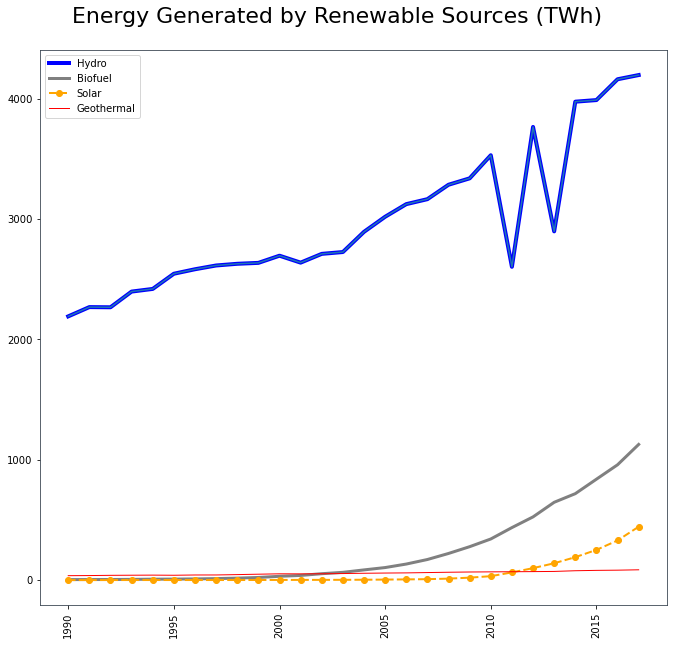

In [35]:
fig, ax = plt.subplots(figsize=(10,9)) 

years = df_total_power.iloc[:,0]

y5 = df_total_power.iloc[:,1]
y6 = df_total_power.iloc[:,2]
y7 = df_total_power.iloc[:,3]
y8 = df_total_power.iloc[:,4]


ax.tick_params(axis='x', rotation=90)

plt.plot( years, y5, marker='',  color='blue', linewidth=4, label="Hydro")
plt.plot( years, y6, marker='', color='gray', linewidth=3, label="Biofuel")
plt.plot( years, y7, marker='o', color='orange', linewidth=2, linestyle='dashed', label="Solar")
plt.plot( years, y8, marker='', color='red', linewidth=1, label="Geothermal")

plt.plot(years, y5)
plt.legend()
fig.tight_layout(pad=3)
fig.suptitle('Energy Generated by Renewable Sources (TWh)', fontsize=22, y=1.02, color='black')

### Mudança percentual de geração de energia renovável

In [41]:
df_total_power['Hydro(TWh)'].iloc[-1]

4197.29

In [47]:
# Selecionar o primeiro (1990) e último (2017) valor das energias renováveis
hydro_change = [df_total_power['Hydro(TWh)'].iloc[0], df_total_power['Hydro(TWh)'].iloc[-1]]
solar_change = [df_total_power['Solar PV (TWh)'].iloc[0], df_total_power['Solar PV (TWh)'].iloc[-1]]
biofuel_change = [df_total_power['Biofuel(TWh)'].iloc[0], df_total_power['Biofuel(TWh)'].iloc[-1]]

# Transforma em serie 
hydro_change = pd.Series(hydro_change)
solar_change = pd.Series(solar_change)
biofuel_change = pd.Series(biofuel_change)

# Transformar em Porcentagem
Hydro = (hydro_change.pct_change()*100)
Solar = (solar_change.pct_change()*100)  
Biofuel = (biofuel_change.pct_change()*100)

print('Hydro: ', Hydro[1])
print('Biofuel: ', Biofuel[1])
print('Solar: ', Solar[1])

Hydro:  91.51103952693606
Biofuel:  28954.381443298967
Solar:  492733.3333333334


Enquanto a quantidade de energia hidrelétrica produzida globalmente aumentou 89,3% nos últimos 27 anos, e a proveniente de biocombustíveis 28.954,38%, a energia solar liderou, aumentando surpreendentes 49.2733,33%. Mesmo após os aumentos iniciais mais elevados pós-VP 2010, mantivemos um aumento de aproximadamente 32% ao ano entre 2013-2017.

Além do desenvolvimento de painéis solares fotovoltaicos (PV) em 2010, de novos algoritmos de otimização inspirados na natureza para a geração, distribuição e gestão de energia renovável, a política também está desempenhando um papel fundamental. Mais especificamente, políticas como as da Califórnia, que exigem que as casas construídas depois de 2020 tenham telhados solares, descontos para painéis solares alemães e outros incentivos financeiros, e as microrredes australianas alimentadas por blockchain que utilizam IA para comprar e vender o excesso de energia, estão a impulsionar o setor ainda mais. .

No entanto, o armazenamento ainda é um grande obstáculo, impedindo que as energias renováveis, especificamente a solar e a eólica, capturem 40% do mercado mundial de energia, conforme projetado para 2040. Assim, para superar os problemas relativos ao uso excessivo de metais preciosos necessários para baterias, a bio- os tecnólogos estão explorando possibilidades de substituir as baterias convencionais de íons de lítio por polipeptídeos sintéticos – que constituem as proteínas – e outros polímeros. Combine isso com a conversão de energia solar policromática e o futuro da energia solar começa a parecer ainda mais brilhante.

Dito isto, o que este conjunto de dados deixou de fora são dados de séries temporais para a produção eólica global (TWh), que seriam interessantes para comparar com as melhorias da energia solar.

### Consumo Global de Energia

In [48]:
df_country_cons = pd.read_csv('.../Global Energy Consumption & Renewable Generation/Country_Consumption_TWH.xls')
df_cont_cons = pd.read_csv('.../Global Energy Consumption & Renewable Generation/Continent_Consumption_TWH.xls')

In [49]:
df_cont_cons.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


Text(0.5, 1.02, 'Continent/Group Power Consumption (TWh)')

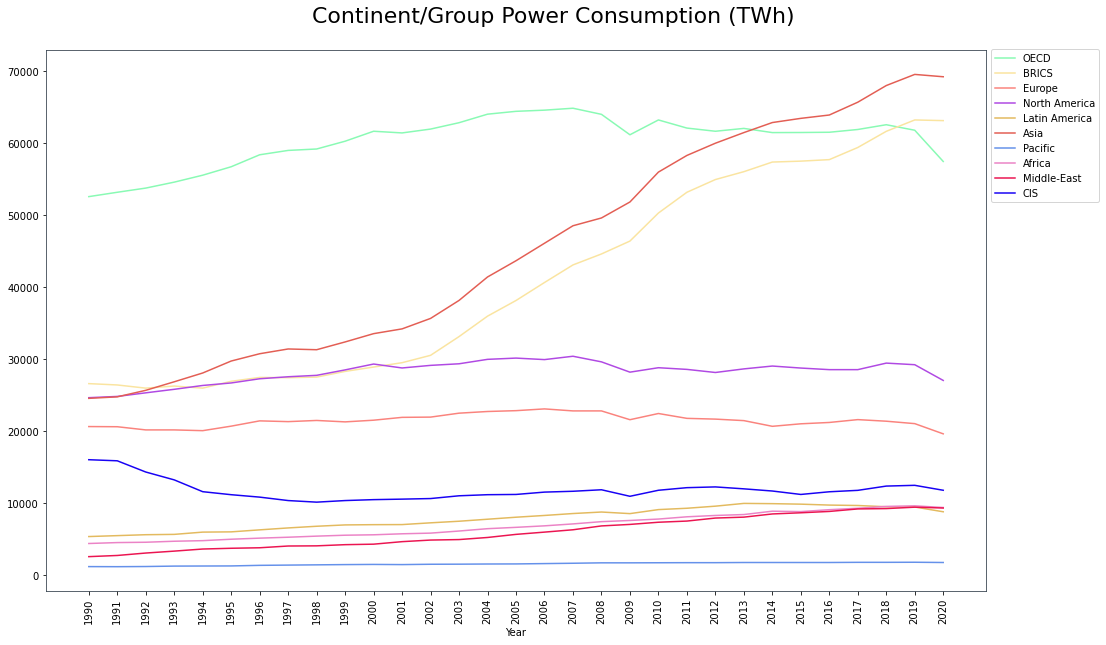

In [52]:
colors = ['#89FAB4', '#FAE4A0', '#FA837D', '#B049E3', 
          '#E3BA5F', '#E35E54', '#6591EA', '#EB83C6', 
          '#EB1551', '#1802F4']

ax = df_cont_cons.plot(x='Year', y=df_cont_cons.columns[2:], color=colors, figsize=(16, 9))  # plot the dataframe and set Time as x
fig = ax.get_figure()  # extract the figure object
ax.set_xticks(df_cont_cons.Year)  # set the xticks
ax.tick_params(axis='x', rotation=90)
ax.legend(bbox_to_anchor=(1, 1.01), loc='upper left') # move the legend
fig.tight_layout(pad=3)
fig.suptitle('Continent/Group Power Consumption (TWh)', fontsize=22, y=1.02, color='black')

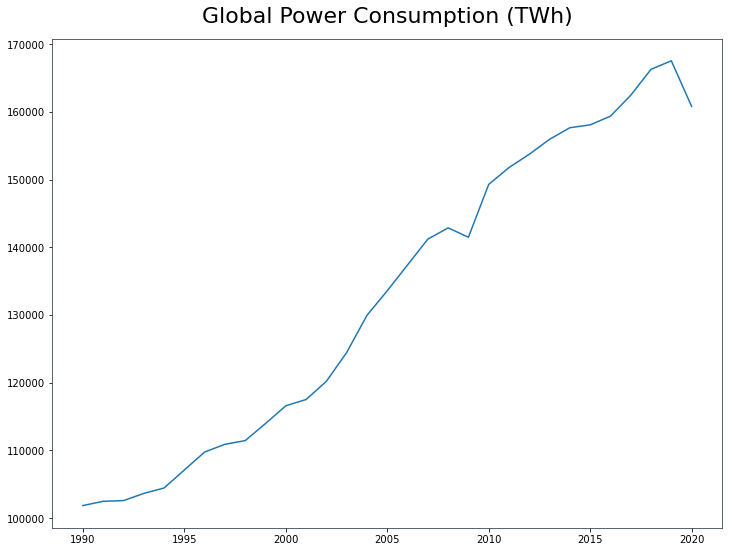

In [53]:
fig, ax = plt.subplots(figsize=(12, 9)) 

X1 = df_cont_cons.iloc[:,0]
y1 = df_cont_cons.iloc[:,1]
plt.title('Global Power Consumption (TWh)', fontsize=22, y=1.02, color='black')
plt.plot(X1,y1)

In [54]:
df_country_cons.head()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
0,1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1,1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
2,1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
3,1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
4,1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


In [55]:
df_mean = df_country_cons.mean()
df_med=df_mean.mean()
print(df_med)

265.5032258064516


Embora a média das médias de todas as linhas seja 265, baixei o limite daquelas para representar graficamente abaixo para 220 para poder incluir as 9 primeiras, uma vez que a posição atípica da China e dos EUA puxa a média para cima.

In [60]:
df_med = df_country_cons.loc[:,df_country_cons.mean(axis=0) > 210]
df_med.head(10)

,Year,China,United States,Brazil,France,Germany,Russia,Canada,Japan,South Korea,India
0,1990.0,874.0,1910.0,141.0,225.0,351.0,879.0,211.0,440.0,94.0,306.0
1,1991.0,848.0,1925.0,143.0,237.0,344.0,871.0,210.0,445.0,101.0,318.0
2,1992.0,877.0,1964.0,145.0,234.0,338.0,795.0,216.0,455.0,111.0,330.0
3,1993.0,929.0,1998.0,148.0,238.0,335.0,751.0,223.0,458.0,125.0,338.0
4,1994.0,973.0,2036.0,156.0,231.0,333.0,657.0,231.0,483.0,133.0,351.0
5,1995.0,1045.0,2063.0,162.0,240.0,336.0,636.0,234.0,495.0,146.0,371.0
6,1996.0,1074.0,2108.0,170.0,251.0,348.0,630.0,239.0,506.0,158.0,383.0
7,1997.0,1073.0,2130.0,179.0,244.0,345.0,602.0,242.0,511.0,172.0,398.0
8,1998.0,1079.0,2148.0,183.0,252.0,343.0,588.0,240.0,502.0,158.0,407.0
9,1999.0,1099.0,2206.0,187.0,252.0,335.0,609.0,247.0,510.0,174.0,431.0


Text(0.5, 1.02, 'Top 10 Countries with the Highest Average Power Consumption (TWh)')

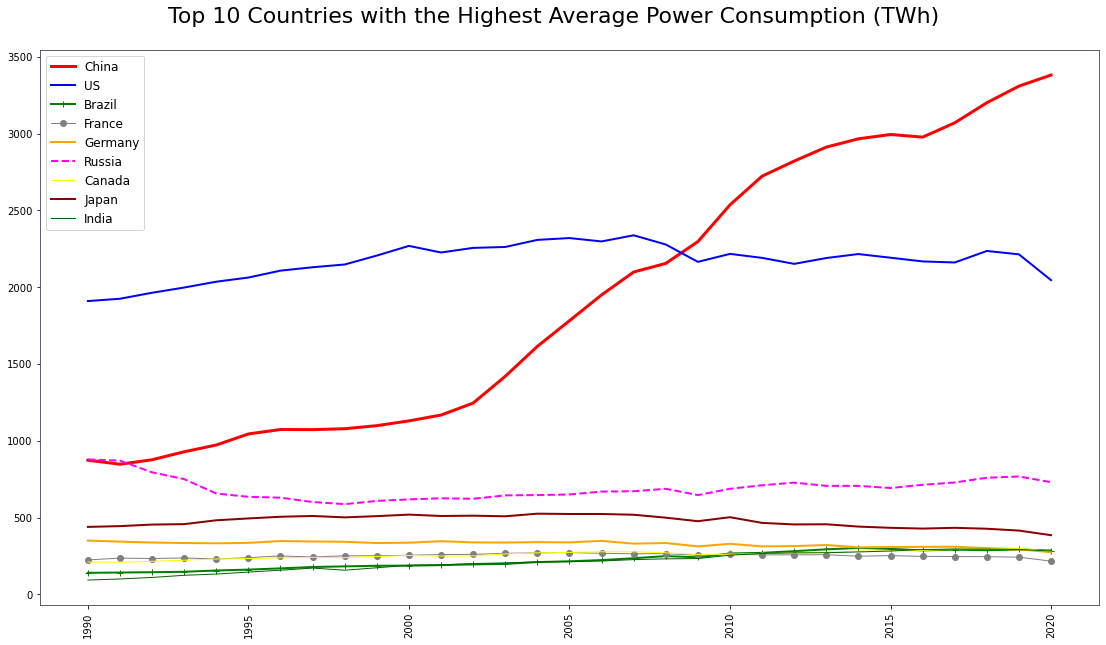

In [59]:
fig, ax = plt.subplots(figsize=(16,9)) 

X1 = df_med.iloc[:,0]

y1 = df_med.iloc[:,1]
y2 = df_med.iloc[:,2]
y3 = df_med.iloc[:,3]
y4 = df_med.iloc[:,4]
y5 = df_med.iloc[:,5]
y6 = df_med.iloc[:,6]
y7 = df_med.iloc[:,7]
y8 = df_med.iloc[:,8]
y9 = df_med.iloc[:,9]

ax.tick_params(axis='x', rotation=90)

plt.plot( X1, y1, marker='', color='red', linewidth=3, label = 'China')
plt.plot( X1, y2, marker='', color='blue', linewidth=2, label= 'US')
plt.plot( X1, y3, marker='+', color='green', linewidth=2, label="Brazil")
plt.plot( X1, y4, marker='o', color='grey', linewidth=1, label="France")
plt.plot( X1, y5, marker='', color='orange', linewidth=2, label="Germany")
plt.plot( X1, y6, marker='', color='magenta', linewidth=2, linestyle='dashed' , label="Russia") 
plt.plot( X1, y7, marker='', color='yellow', linewidth=1, label="Canada")
plt.plot( X1, y8, marker='', color='darkred', linewidth=2, label="Japan")
plt.plot( X1, y9, marker='', color='darkgreen', linewidth=1, label="India")

plt.legend(fontsize=12)
fig.tight_layout(pad=3)
fig.suptitle('Top 10 Countries with the Highest Average Power Consumption (TWh)', fontsize=22, y=1.02, 
             color='black')

O progresso do desenvolvimento da China e a sua capacidade de tirar milhões de pessoas da pobreza nos últimos 20 anos também se reflectem no aumento do seu consumo de energia, como mostrado acima. Assim, os números dos BRICS e da Ásia mostram tendências semelhantes e pode-se esperar que África seja a próxima na fila.

Por sua vez, isto lança alguma luz sobre as intensas ramificações que ocorrerão à medida que grandes populações de muitas nações em desenvolvimento, como a Índia, a Tailândia e o Brasil, forem retiradas da pobreza e começarem a consumir como as do Norte, especialmente os EUA, que o fizeram. e em grande parte, continua a promover um 'sonho' e um estilo de vida de consumo excessivo e riqueza material. Permanece a questão de como tal mobilidade social pode ser alcançada de forma sustentável e que incorpore valor não apenas baseado na destruição de recursos ecológicos, e o que isso diz às muitas populações que o têm perseguido e prometido.

Embora 2020 tenha sido o primeiro ano em muitos, em que o consumo global de energia diminuiu para muitos países desenvolvidos/OCDE, como visto na figura do continente/grupo acima, é difícil supor exatamente quanto disso é resultado do aumento do uso de energias renováveis , ou mudanças sociais e de valores que passaram do materialismo para formas de valor baseadas na experiência e no acesso. É interessante notar que o Japão manteve uma taxa de crescimento do consumo negativa nos últimos 4 anos, com aumentos mínimos nos últimos 15 e, em números relativos, é aproximadamente metade da dos EUA. Para ter uma ideia melhor da intensidade do consumo de energia nos EUA, vamos fazer algumas comparações em termos de per capita – veja abaixo.

In [62]:
US_pop = 365000000
US_KWh = 2265000000000
US_capita =US_KWh/US_pop

Brazil_pop = 262000000 
Brazil_KWh = 242000000000
Brazil_capita = Brazil_KWh/Brazil_pop

US_Brazil_pop_diff = ((US_pop-Brazil_pop) / ((US_pop+Brazil_pop)/2))*100

Japan_pop = 125000000
Japan_KWh= 477000000000
Japan_capita = Japan_KWh/Japan_pop


print(str(US_capita) + " é o consumo per capita de quilowatts-hora para os EUA, enquanto o do Brasil é "
      + str(Brazil_capita) + " Isto representa um aumento superior a 571%, um número preocupante quando se considera que a população do Brasil, apenas " + 
      str(US_Brazil_pop_diff) +"% menos que os EUA, está começando a consumir como os americanos. O Japão, por outro lado, manteve um nível de consumo metade do per capita dos EUA, com " + 
      str(Japan_capita))

6205.479452054795 é o consumo per capita de quilowatts-hora para os EUA, enquanto o do Brasil é 923.6641221374045 Isto representa um aumento superior a 571%, um número preocupante quando se considera que a população do Brasil, apenas 32.854864433811805% menos que os EUA, está começando a consumir como os americanos. O Japão, por outro lado, manteve um nível de consumo metade do per capita dos EUA, com 3816.0


In [63]:
df_country_cons = df_country_cons.set_index(df_country_cons['Year'])
df_country_cons = df_country_cons.dropna()
df_country_cons = df_country_cons.drop(columns=['Year'])
df_country_cons.head()

,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,Poland,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,103.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,101.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,99.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,101.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,96.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


Alteração percentual - Calculando a maior e a menor alteração percentual no consumo de energia de 1990 a 2020

In [64]:
df_pct = df_country_cons.append(df_country_cons.iloc[[0, -1]].pct_change().iloc[-1].mul(100).rename('percChng'))
df_pct = df_pct.reset_index()
percChange = df_pct.loc[[31]]
percChange.head(20)

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
31,percChng,286.842105,7.120419,102.836879,6.25,-22.0,-3.555556,-21.652422,-6.802721,4.477612,...,46.511628,50.0,168.181818,178.787879,140.909091,37.777778,288.405797,322.222222,260.344828,305.0


In [65]:
df_pct_change = percChange.iloc[-1].reset_index()
df_pct_change= df_pct_change.drop(0)
df_pct_change = df_pct_change.rename(columns= {'index': 'Country', 31:'percChange'})

convert_dict = {'Country': str,
                'percChange': float
               }
  
df_pct_change = df_pct_change.astype(convert_dict)
df_change_top = df_pct_change.nlargest(20, 'percChange').reset_index()
df_change_top.head(20)

,index,Country,percChange
0,42,Kuwait,322.222222
1,30,Malaysia,319.047619
2,44,United Arab Emirates,305.000000
3,41,Iran,288.405797
4,1,China,286.842105
5,43,Saudi Arabia,260.344828
6,31,South Korea,201.063830
7,33,Thailand,197.619048
8,34,India,196.732026
9,38,Egypt,178.787879


<BarContainer object of 20 artists>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri


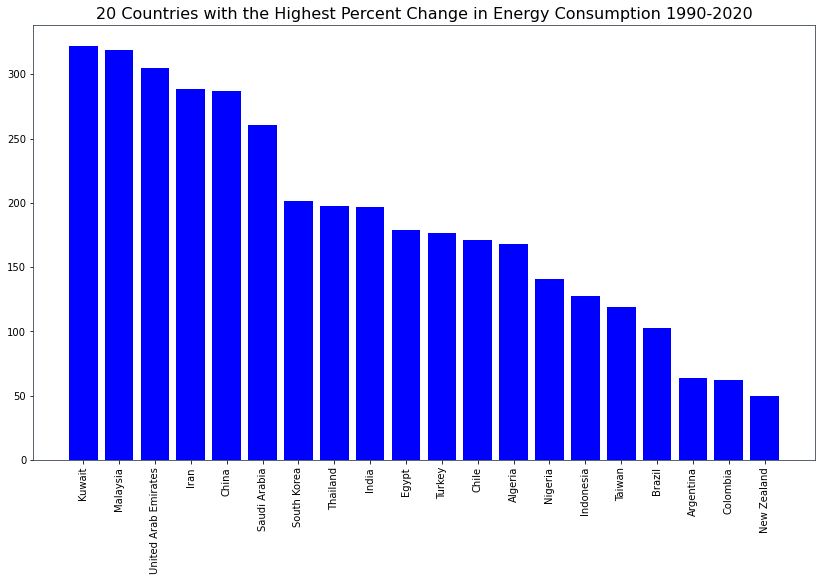

In [66]:
plt.subplots(figsize=(14,8)) 

Xpct = df_change_top.iloc[:,1]
ypct = df_change_top.iloc[:,2]

plt.xticks(rotation=90)
plt.title('20 Countries with the Highest Percent Change in Energy Consumption 1990-2020', 
          fontsize=16, color='black' )
plt.bar(Xpct, ypct, color='blue')

In [67]:
df_pct_low = percChange.iloc[-1].reset_index()

df_pct_low = df_pct_change.rename(columns= {'index': 'Country', 31:'percChange'})

convert_dict = {'Country': str,
                'percChange': float
               }
  
df_pct_low = df_pct_low.astype(convert_dict)
df_pct_low = df_pct_low.nsmallest(20, 'percChange').reset_index()
df_pct_low.head()

,index,Country,percChange
0,20,Ukraine,-65.873016
1,12,Romania,-48.387097
2,27,Venezuela,-27.500000
3,15,United Kingdom,-25.242718
4,5,Czechia,-22.000000


<BarContainer object of 20 artists>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri


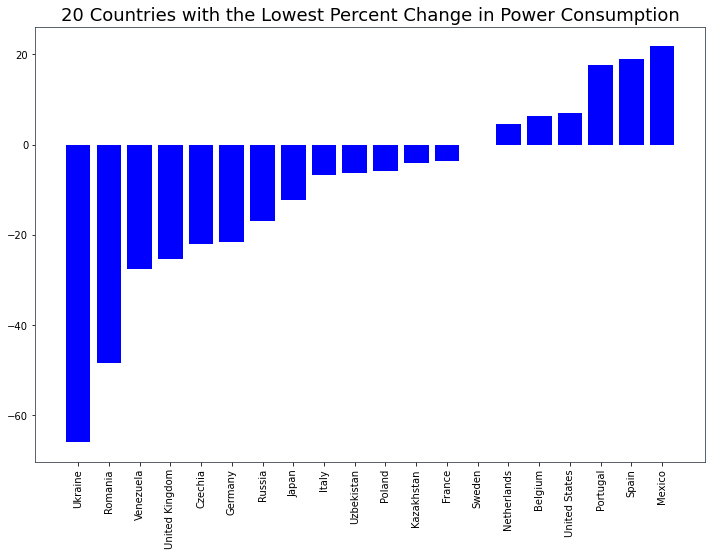

In [68]:
plt.subplots(figsize=(12,8)) 

Xpct = df_pct_low.iloc[:,1]
ypct = df_pct_low.iloc[:,2]

plt.xticks(rotation=90)
plt.title('20 Countries with the Lowest Percent Change in Power Consumption', fontsize=18, color='black' )
plt.bar(Xpct, ypct, color='blue')

In [69]:
dfsum =df_total_renew.sum()
print(dfsum)

Mode of Generation    HydroWindBiofuelSolar PVGeothermalRenewable wa...
Contribution (TWh)                                             38896.32
dtype: object


In [70]:
total_renew_vs_consumption = {'Global Stats':['Consumption','Renewable Production'], 'TWh': [160819.64,   38896.32]}

totals = pd.DataFrame(total_renew_vs_consumption)

totals.head()


,Global Stats,TWh
0,Consumption,160819.64
1,Renewable Production,38896.32


<BarContainer object of 2 artists>

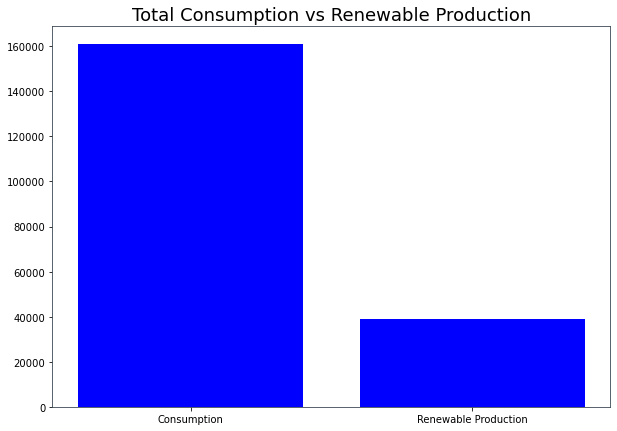

In [71]:
plt.subplots(figsize=(10,7)) 

Xtot = totals.iloc[:,0]
ytot = totals.iloc[:,1]

plt.title('Total Consumption vs Renewable Production', fontsize=18, color='black' )
plt.bar(Xtot, ytot, color='blue')


Embora a geração de energia renovável tenha de facto registado ganhos notáveis ao longo dos últimos 30 anos devido aos avanços tecnológicos e à maior adopção, ainda temos um longo caminho a percorrer, especialmente quando se considera o crescimento maciço do consumo de energia nos países em desenvolvimento, o que provavelmente irá continuar com intensidade crescente. Embora as inovações ajudem a equilibrar estes aumentos até certo ponto, grande parte da mudança necessária é de uma perspectiva social e de concepções de materialismo, valor, “progresso” e “desenvolvimento”. Felizmente, a falácia do “Sonho Americano” e os seus danos ao ambiente e à sociedade foram expostos nas últimas décadas, e um novo “Sonho Global” está lentamente a ser formado graças a acordos políticos internacionais e a movimentos sociais mais amplos, como o “Sexta-feira”. para o Futuro”, os ODS e o Acordo Climático de Paris.